In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
color_pal=sns.color_palette()
from sklearn.metrics import mean_squared_error,mean_absolute_error, mean_absolute_percentage_error
from sklearn.metrics import r2_score

In [2]:
df=pd.read_csv('product h_basemodel.csv', parse_dates=['Month-Year'], index_col='Month-Year')

In [3]:
sales_h= df.drop(['Product Name','Product Category','Month','Year', 'SMA_12months','SMA_6months','SMA_3months'],axis=1)

In [4]:
sales_h.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 60 entries, 2019-01-01 to 2023-12-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Sales   60 non-null     int64
dtypes: int64(1)
memory usage: 960.0 bytes


In [5]:
sales_h.head()

,Sales
Month-Year,
2019-01-01,62686
2019-02-01,74426
2019-03-01,91347
2019-04-01,60600
2019-05-01,37374


<Axes: title={'center': 'Product H'}, xlabel='Month-Year'>

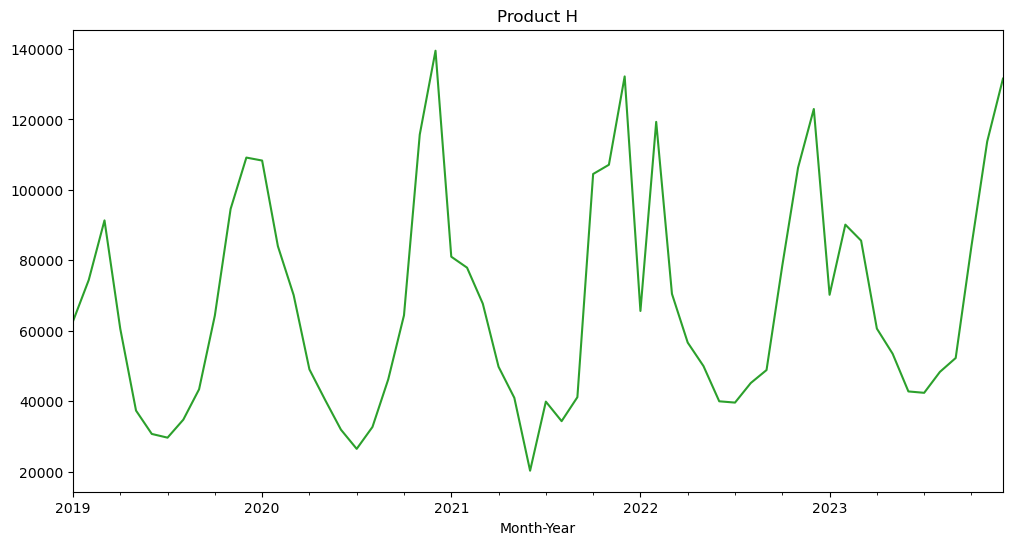

In [6]:
sales_h['Sales'].plot(figsize=(12,6),color=color_pal[2],title='Product H')

In [7]:
train_12= sales_h[:48]
test_12= sales_h[48:]

In [8]:
y_hat_sma = sales_h.copy()
ma_window = 12
y_hat_sma['sma_forecast'] = sales_h['Sales'].rolling(ma_window).mean().shift()
y_hat_sma['sma_forecast'][len(train_12):] = y_hat_sma['sma_forecast'][len(train_12)]

C:\Users\Maaz\AppData\Local\Temp\ipykernel_9716\1924113881.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_hat_sma['sma_forecast'][len(train_12):] = y_hat_sma['sma_forecast'][len(train_12)]


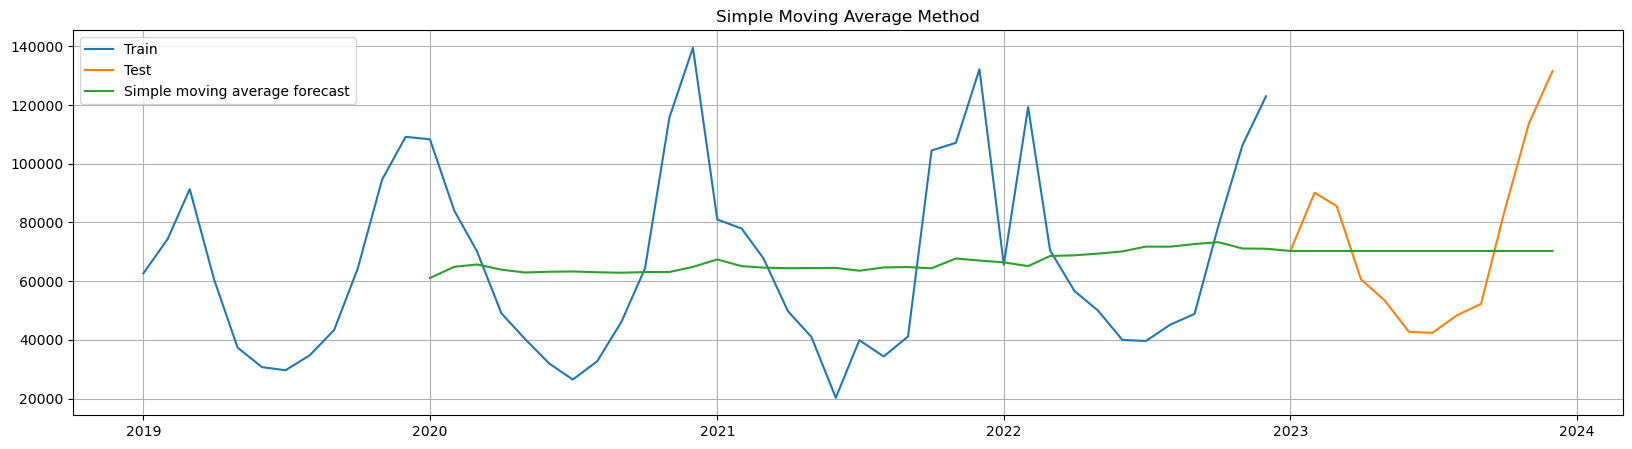

In [9]:
plt.figure(figsize=(20,5))
plt.grid()
plt.plot(train_12['Sales'], label='Train')
plt.plot(test_12['Sales'], label='Test')
plt.plot(y_hat_sma['sma_forecast'], label='Simple moving average forecast')
plt.legend(loc='best')
plt.title('Simple Moving Average Method')
plt.show()

In [10]:
y_hat_sma

,Sales,sma_forecast
Month-Year,,
2019-01-01,62686,NaN
2019-02-01,74426,NaN
2019-03-01,91347,NaN
2019-04-01,60600,NaN
2019-05-01,37374,NaN
2019-06-01,30737,NaN
2019-07-01,29683,NaN
2019-08-01,34788,NaN
2019-09-01,43408,NaN


In [11]:
pred_12= y_hat_sma['sma_forecast'].iloc[48:]

In [12]:
pred_12

Month-Year
2023-01-01    70298.25
2023-02-01    70298.25
2023-03-01    70298.25
2023-04-01    70298.25
2023-05-01    70298.25
2023-06-01    70298.25
2023-07-01    70298.25
2023-08-01    70298.25
2023-09-01    70298.25
2023-10-01    70298.25
2023-11-01    70298.25
2023-12-01    70298.25
Name: sma_forecast, dtype: float64

In [13]:
mae_12= mean_absolute_error(test_12,pred_12)
mse_12=mean_squared_error(test_12,pred_12)
mape_12= mean_absolute_percentage_error(test_12,pred_12)
rmse_12= np.sqrt(mean_squared_error(test_12,pred_12))

print(f'MAE - Simple Moving Averages_12 months: {mae_12:0.3f}')
print(f'MAPE - Simple Moving Averages_12 months: {mape_12:0.3f}')
print(f'MSE - Simple Moving Averages_12 months: {mse_12:0.3f}')
print(f'RMSE - Simple Moving Averages_12 months: {rmse_12:0.3f}')

MAE - Simple Moving Averages_12 months: 22954.542
MAPE - Simple Moving Averages_12 months: 0.332
MSE - Simple Moving Averages_12 months: 764452691.896
RMSE - Simple Moving Averages_12 months: 27648.738


In [14]:
train_6= sales_h[:54]
test_6= sales_h[54:]

In [15]:
y_hat_sma_6 = sales_h.copy()
ma_window_6 = 6
y_hat_sma_6['sma_forecast'] = sales_h['Sales'].rolling(ma_window_6).mean().shift()
y_hat_sma_6['sma_forecast'][len(train_6):] = y_hat_sma_6['sma_forecast'][len(train_6)]

C:\Users\Maaz\AppData\Local\Temp\ipykernel_9716\1729931315.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_hat_sma_6['sma_forecast'][len(train_6):] = y_hat_sma_6['sma_forecast'][len(train_6)]


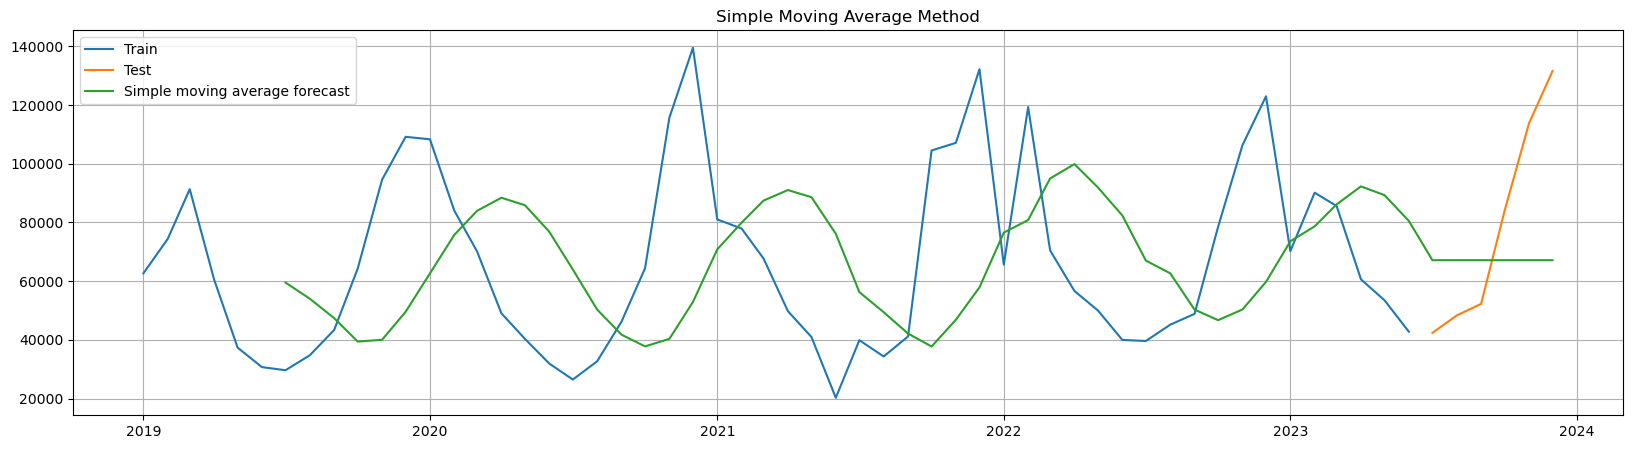

In [16]:
plt.figure(figsize=(20,5))
plt.grid()
plt.plot(train_6['Sales'], label='Train')
plt.plot(test_6['Sales'], label='Test')
plt.plot(y_hat_sma_6['sma_forecast'], label='Simple moving average forecast')
plt.legend(loc='best')
plt.title('Simple Moving Average Method')
plt.show()

In [17]:
y_hat_sma_6

,Sales,sma_forecast
Month-Year,,
2019-01-01,62686,NaN
2019-02-01,74426,NaN
2019-03-01,91347,NaN
2019-04-01,60600,NaN
2019-05-01,37374,NaN
2019-06-01,30737,NaN
2019-07-01,29683,59528.333333
2019-08-01,34788,54027.833333
2019-09-01,43408,47421.500000


In [18]:
pred_6= y_hat_sma_6['sma_forecast'].iloc[54:]

In [19]:
pred_6

Month-Year
2023-07-01    67150.666667
2023-08-01    67150.666667
2023-09-01    67150.666667
2023-10-01    67150.666667
2023-11-01    67150.666667
2023-12-01    67150.666667
Name: sma_forecast, dtype: float64

In [20]:
mae_6= mean_absolute_error(test_6,pred_6)
mse_6=mean_squared_error(test_6,pred_6)
mape_6= mean_absolute_percentage_error(test_6,pred_6)
rmse_6= np.sqrt(mean_squared_error(test_6,pred_6))

print(f'MAE - Simple Moving Averages_6 months: {mae_6:0.3f}')
print(f'MAPE - Simple Moving Averages_6 months: {mape_6:0.3f}')
print(f'MSE - Simple Moving Averages_6 months: {mse_6:0.3f}')
print(f'RMSE - Simple Moving Averages_6 months: {rmse_6:0.3f}')

MAE - Simple Moving Averages_6 months: 31047.333
MAPE - Simple Moving Averages_6 months: 0.393
MSE - Simple Moving Averages_6 months: 1298632716.778
RMSE - Simple Moving Averages_6 months: 36036.547


In [21]:
train_3= sales_h[:57]
test_3= sales_h[57:]

In [22]:
y_hat_sma_3 = sales_h.copy()
ma_window_3 = 3
y_hat_sma_3['sma_forecast'] = sales_h['Sales'].rolling(ma_window_3).mean().shift()
y_hat_sma_3['sma_forecast'][len(train_3):] = y_hat_sma_3['sma_forecast'][len(train_3)]

C:\Users\Maaz\AppData\Local\Temp\ipykernel_9716\1607144085.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_hat_sma_3['sma_forecast'][len(train_3):] = y_hat_sma_3['sma_forecast'][len(train_3)]


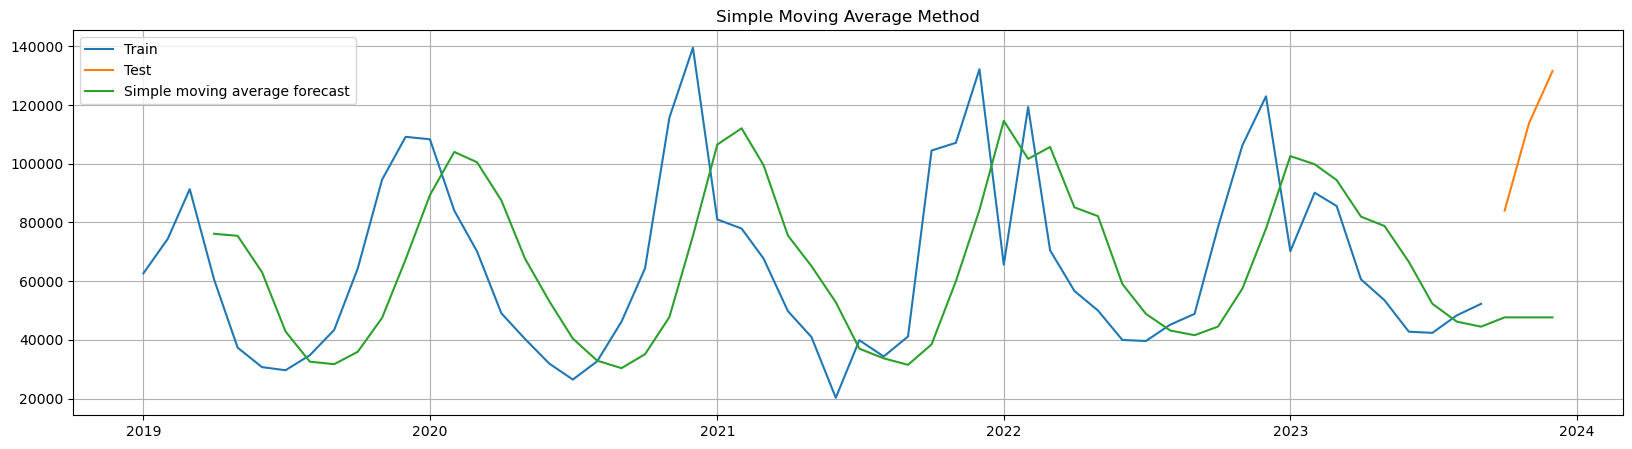

In [23]:
plt.figure(figsize=(20,5))
plt.grid()
plt.plot(train_3['Sales'], label='Train')
plt.plot(test_3['Sales'], label='Test')
plt.plot(y_hat_sma_3['sma_forecast'], label='Simple moving average forecast')
plt.legend(loc='best')
plt.title('Simple Moving Average Method')
plt.show()

In [24]:
y_hat_sma_3

,Sales,sma_forecast
Month-Year,,
2019-01-01,62686,NaN
2019-02-01,74426,NaN
2019-03-01,91347,NaN
2019-04-01,60600,76153.000000
2019-05-01,37374,75457.666667
2019-06-01,30737,63107.000000
2019-07-01,29683,42903.666667
2019-08-01,34788,32598.000000
2019-09-01,43408,31736.000000


In [25]:
pred_3= y_hat_sma_3['sma_forecast'].iloc[57:]

In [26]:
pred_3

Month-Year
2023-10-01    47682.666667
2023-11-01    47682.666667
2023-12-01    47682.666667
Name: sma_forecast, dtype: float64

In [27]:
mae_3= mean_absolute_error(test_3,pred_3)
mse_3=mean_squared_error(test_3,pred_3)
mape_3= mean_absolute_percentage_error(test_3,pred_3)
rmse_3= np.sqrt(mean_squared_error(test_3,pred_3))

print(f'MAE - Simple Moving Averages_3 months: {mae_3:0.3f}')
print(f'MAPE - Simple Moving Averages_3 months: {mape_3:0.3f}')
print(f'MSE - Simple Moving Averages_3 months: {mse_3:0.3f}')
print(f'RMSE - Simple Moving Averages_3 months: {rmse_3:0.3f}')

MAE - Simple Moving Averages_3 months: 62094.667
MAPE - Simple Moving Averages_3 months: 0.550
MSE - Simple Moving Averages_3 months: 4240484256.667
RMSE - Simple Moving Averages_3 months: 65119.001
